# Statistics of the Character Table of Symmetric Groups $S_n$

In this Jupyter Notebook, we aim to study some properties of the character table of the symmetric group $S_n$.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import frobenius as fb
import murnaghan_nakayama as mn

In [46]:
def heatmap(n, character_table, threshold=0, partition_list=None):
    def exp_label(partition):
        res = "("
        for key in partition[0 : len(partition) - 1]:
            res += "{},".format(key)
        res += "{})".format(partition[len(partition) - 1])
        return res

    data_array = character_table.values
    if not threshold:
        vmin = -threshold if threshold else data_array.min()
        vmax = threshold if threshold else data_array.max()
        threshold = max(abs(vmin), abs(vmax))
    data_array = np.clip(character_table.values, -threshold, threshold)

    fig, ax = plt.subplots(figsize=(20, 16))
    im = ax.imshow(
        data_array, cmap="coolwarm", interpolation="nearest", vmin=-threshold, vmax=threshold
    )

    if partition_list is not None:
        ylabel = [exp_label(partition) for partition in partition_list]
        xlabel = [ylabel[i] for i in range(len(ylabel) - 1, -1, -1)]
        ax.set_xticks(np.arange(len(xlabel)), labels=xlabel)
        ax.set_yticks(np.arange(len(ylabel)), labels=ylabel)
        plt.setp(ax.get_xticklabels(), rotation=-45, ha="right", rotation_mode="anchor")
        ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    else:
        plt.xticks(range(len(character_table.columns)), character_table.columns)
        plt.yticks(range(len(character_table.index)), character_table.index)
        ax.tick_params(
            axis="both",
            which="both",
            bottom=False,
            top=False,
            left=False,
            right=False,
            labelbottom=False,
            labelleft=False,
        )
    cbar = fig.colorbar(im)

    plt.xlabel("Conjugacy Classes")
    plt.ylabel("Irreps")
    plt.title("Chararacter Table of S{}".format(n))
    plt.show()

## Frobenius Formula

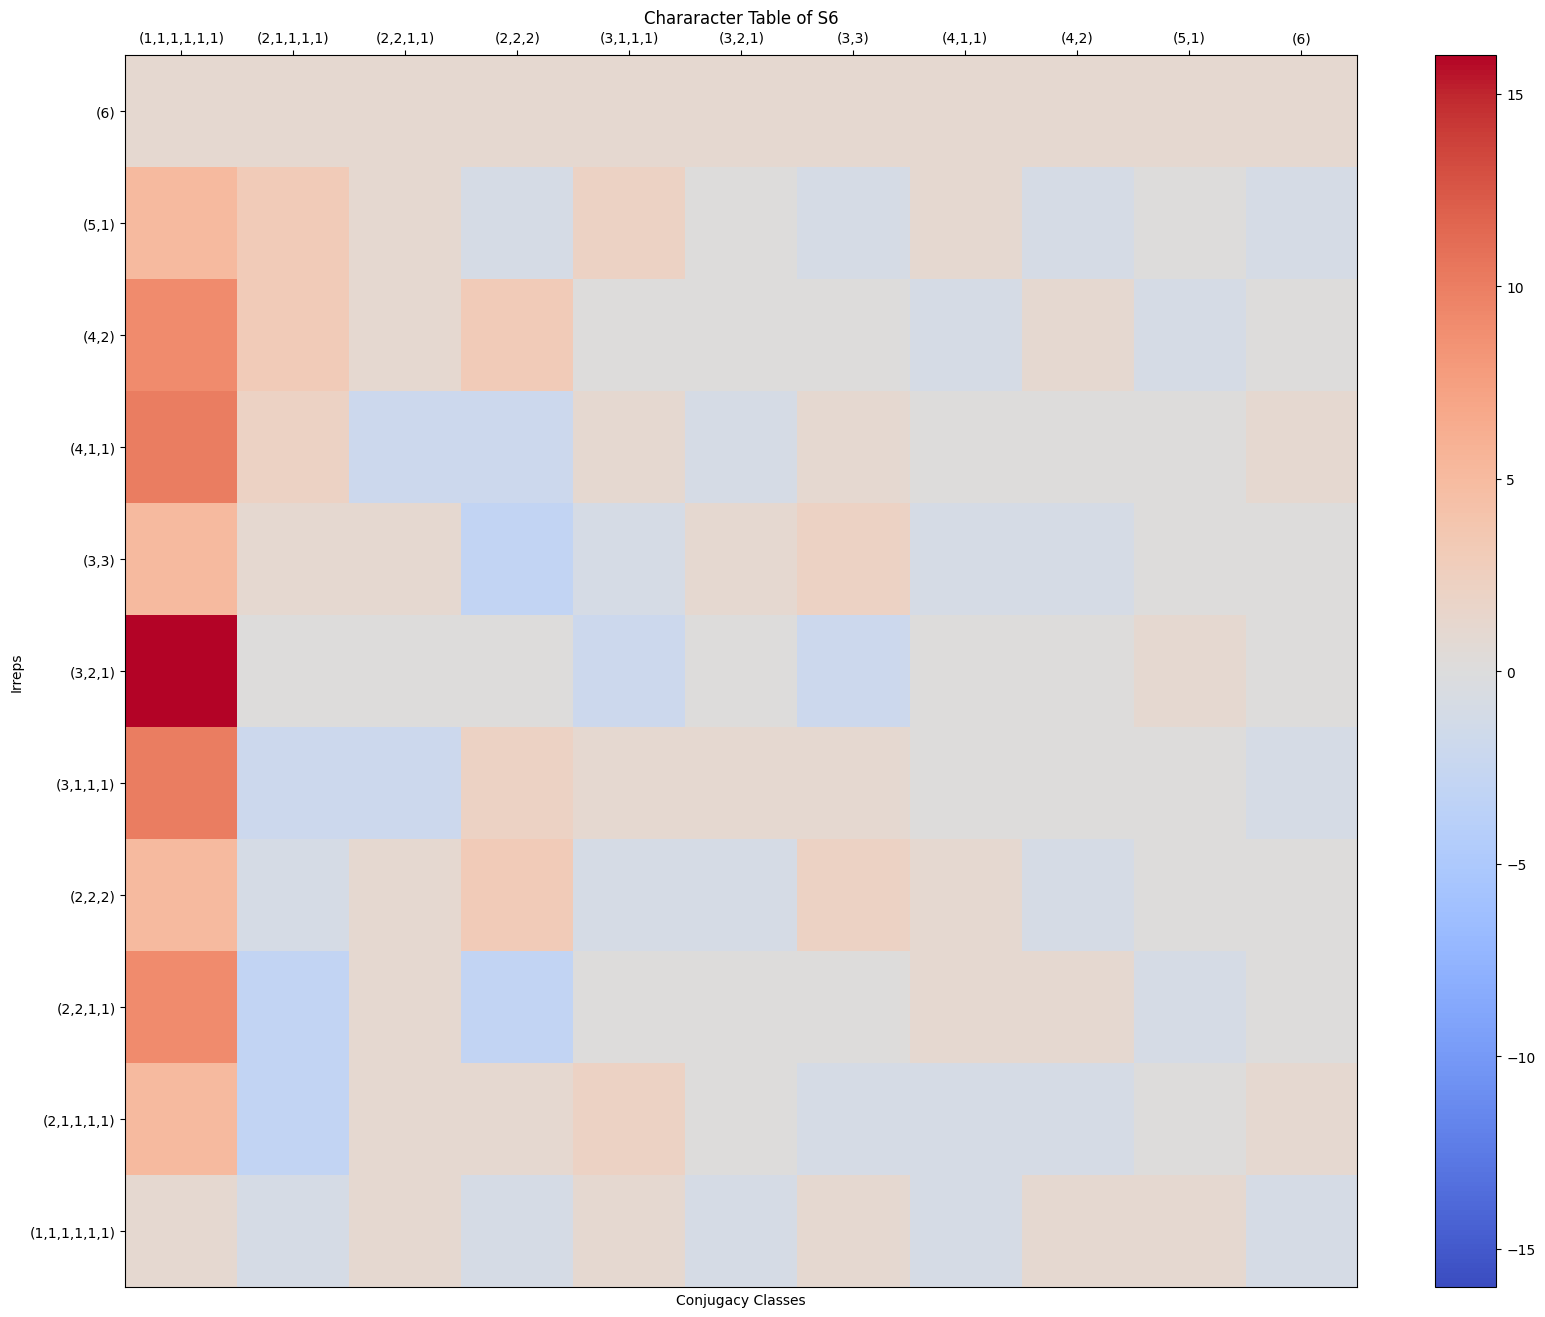

In [47]:
n_fb = 6
partition_list = fb.convert_dict_partitions_to_list(n_fb)
character_table = fb.get_character_table(n_fb)
character_table = pd.DataFrame(character_table)
heatmap(n_fb, character_table, partition_list=partition_list)

## Murnaghan-Nakayama Rule

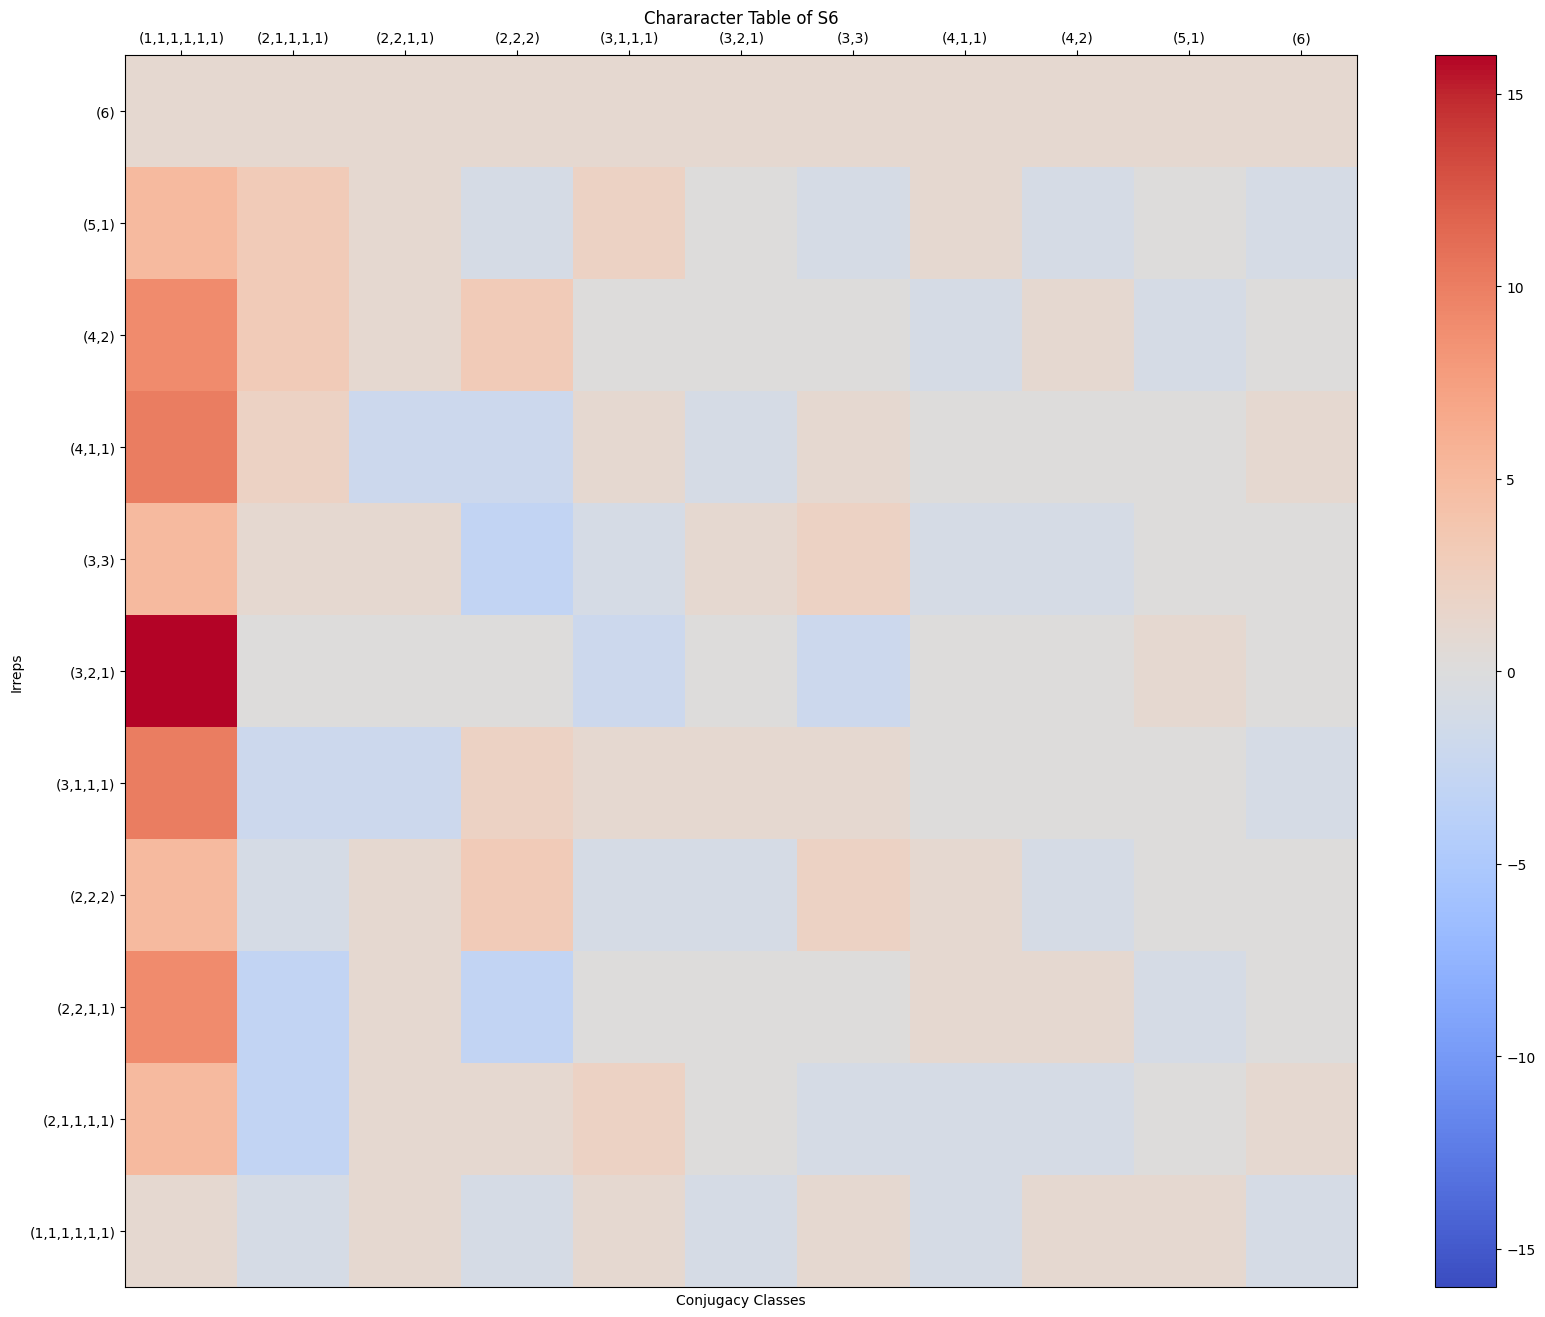

In [48]:
n_mn = 6
partition_list = fb.convert_dict_partitions_to_list(n_mn)   # TODO: make this util function
character_table = mn.get_character_table(n_mn, memo_file_name="")
character_table = pd.DataFrame(character_table)
heatmap(n_mn, character_table, partition_list=partition_list)

## Heatmaps

Now we study some character tables with bigger sizes.

Modify the following macros to change the size of the character table as well as the threshold for the heatmap.

Since the value for some entries are too big, in order to make the color look proportional, we can truncate the value and set up a threshold for the heatmap

Files required:
- S{N}.csv

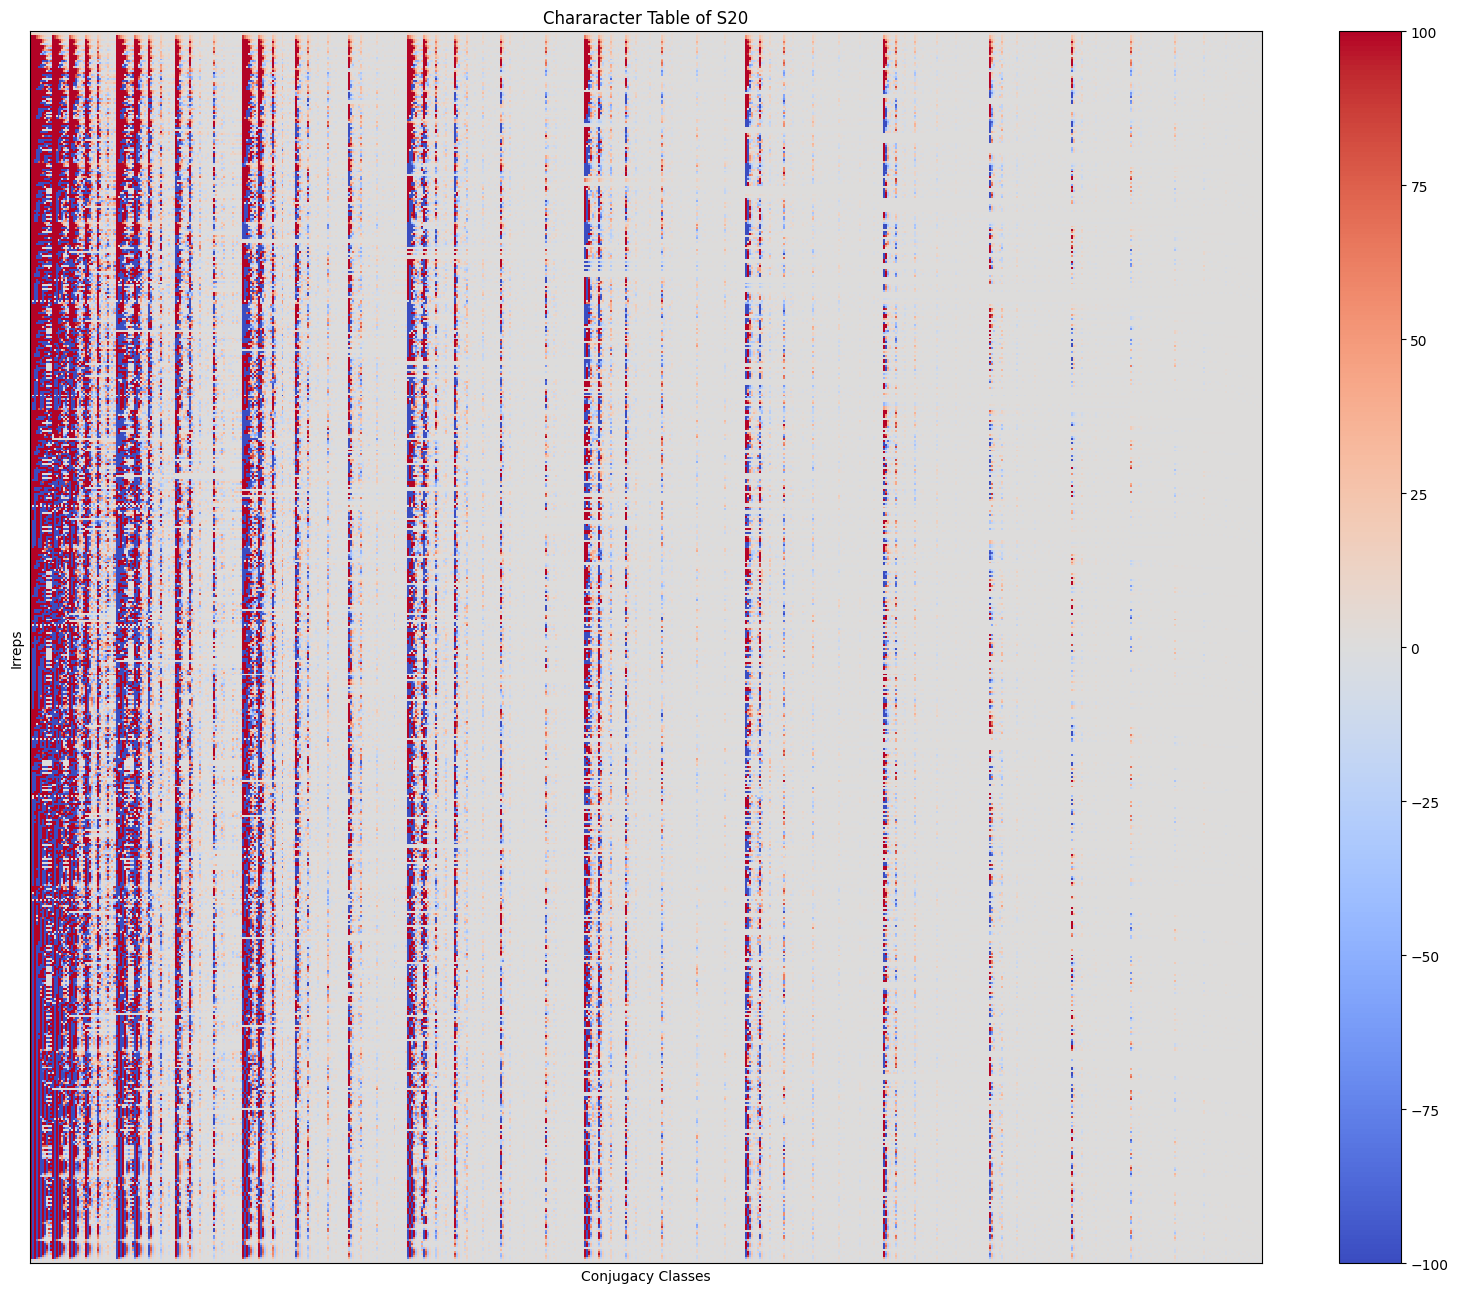

In [49]:
N = 20  # char table size
THRESHOLD = 100 # cutoff value

df = pd.read_csv("S{}.csv".format(N), header=None)
# df_wo_first_column = df.iloc[1:, 1:]  # skip the first column
df_wo_first_column = df.iloc[0:, 0:]
heatmap(N, df_wo_first_column, threshold=THRESHOLD)

## Distribution of the first column

Now we focus on the first column of the character table, note that they are all positive according to the hook length formula.

Files required:
- S{N}.csv

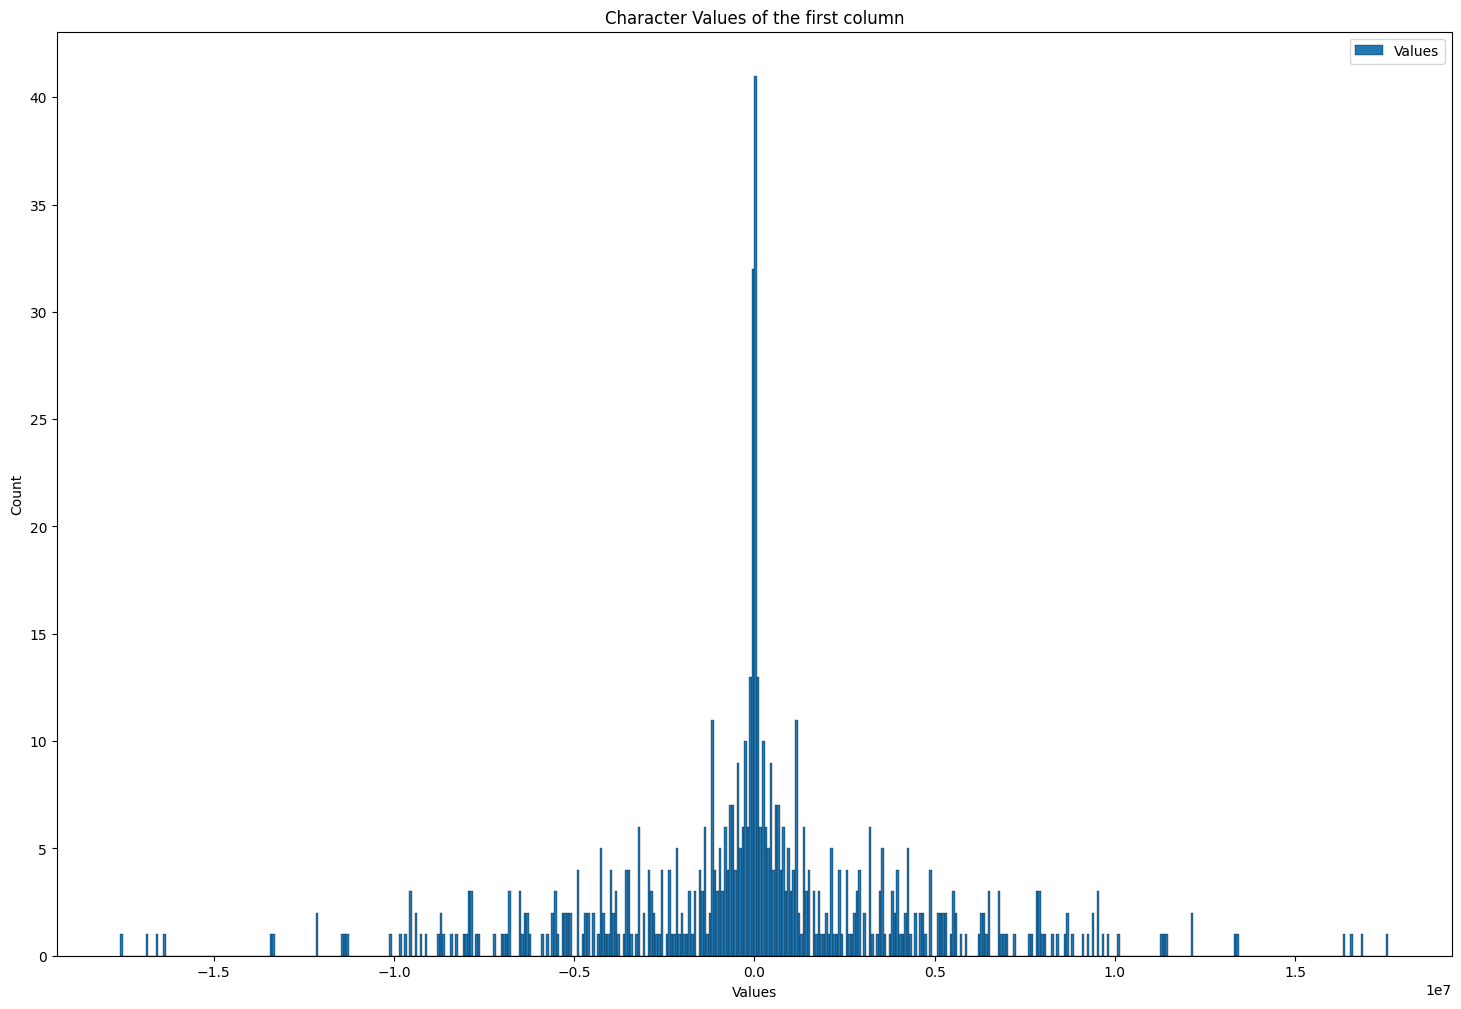

In [50]:
N = 20
df = pd.read_csv("S{}.csv".format(N), header=None)
first_column = df.iloc[:, 1]
values = first_column.values
df2 = pd.DataFrame(values, columns=['Values'])
ax = df2.plot(kind='hist', edgecolor='black', bins=500,
              linewidth=0.2, figsize=(18, 12))
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Character Values of the first column')
plt.show()

## The Density of Zeros in the Character Table of $S_n$
Now we study the number of zero entries in the character table of $S_n$ (it is recorded in OEIS with index [A006907](https://oeis.org/A006907)).

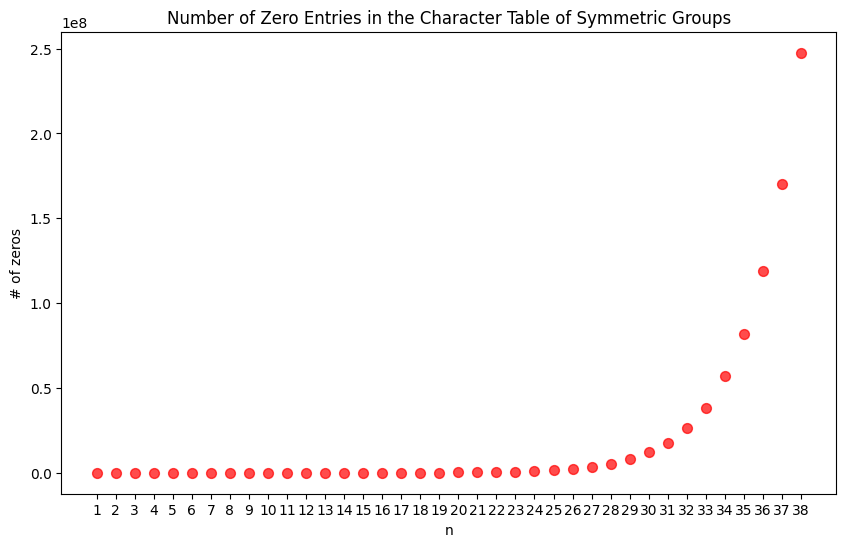

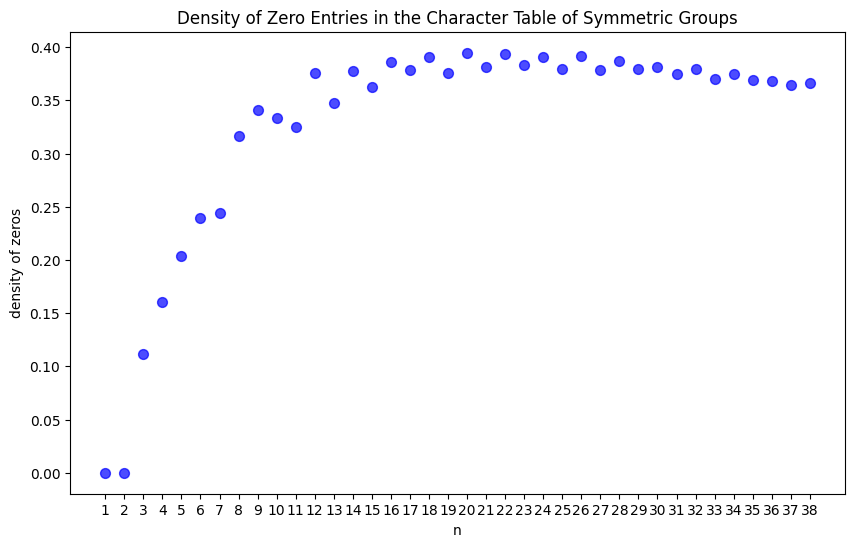

In [51]:
num_of_zeros = [0, 0, 1, 4, 10, 29, 55, 153, 307, 588, 1018, 2230, 3543, 6878,
                11216, 20615, 33355, 57980, 90194, 155176, 239327,
                395473, 604113, 970294, 1453749, 2323476, 3425849,
                5349414, 7905133, 11963861, 17521274, 26472001,
                38054619, 56756488, 81683457, 119005220, 170498286,
                247619748]

num_of_partitions = [1, 2, 3, 5, 7, 11, 15, 22, 30, 42, 56, 77, 101, 135, 176, 231,
                     297, 385, 490, 627, 792, 1002, 1255, 1575, 1958, 2436, 3010,
                     3718, 4565, 5604, 6842, 8349, 10143, 12310, 14883, 17977,
                     21637, 26015, 31185, 37338, 44583, 53174, 63261, 75175,
                     89134, 105558, 124754, 147273, 173525]

density_of_zeros = [num_of_zeros[i] /
                    (num_of_partitions[i]**2) for i in range(38)]

df = pd.DataFrame({'Values': num_of_zeros})
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=df.index, y=df['Values'], color='red', s=50, alpha=0.7)
ax.set_xticks(df.index)
ax.set_xticklabels(df.index + 1)  # Assuming the data is 0-indexed
ax.set_xlabel('n')
ax.set_ylabel('# of zeros')
ax.set_title(
    'Number of Zero Entries in the Character Table of Symmetric Groups')
plt.show()

df2 = pd.DataFrame({'Values': density_of_zeros})
fig2, ax2 = plt.subplots(figsize=(10, 6))
# ax2.vlines(x=df2.index, ymin=0,
#            ymax=df2['Values'], color='blue', alpha=0.7, linewidth=2)
ax2.scatter(x=df2.index, y=df2['Values'], color='blue', s=50, alpha=0.7)
ax2.set_xticks(df2.index)
ax2.set_xticklabels(df2.index + 1)
ax2.set_xlabel('n')
ax2.set_ylabel('density of zeros')
ax2.set_title(
    'Density of Zero Entries in the Character Table of Symmetric Groups')
plt.show()

## Freq. Distribution of Staircase Partition in Triangular Numbers 
Files required:
- S{N}_staircase.csv

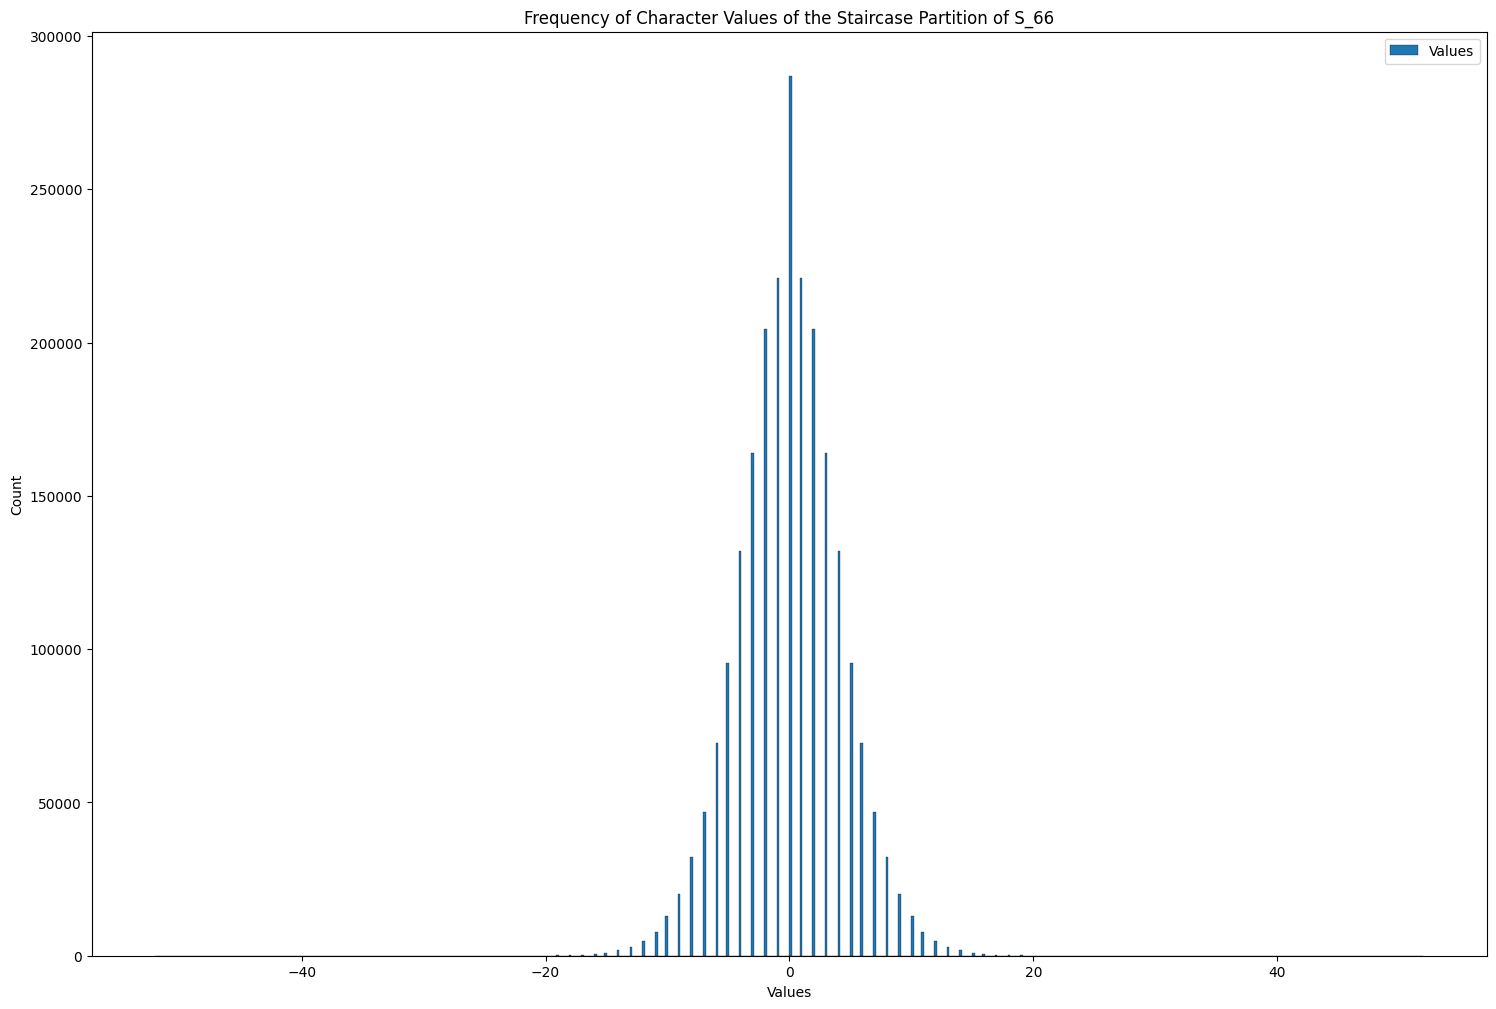

In [52]:
# triangular_numbers_index = {
#     10: 19,  # 21 - 1 - 1
#     15: 73,  # 75 - 1 - 1
# }
N = 66
df = pd.read_csv("S{}_staircase.csv".format(N))
first_column = df.iloc[0:, 0]
positions = range(len(first_column))
values = first_column.values
df2 = pd.DataFrame(values, columns=["Values"])

ax = df2.plot(kind="hist", edgecolor="black", bins=500,
              linewidth=0.2, figsize=(18, 12))
plt.xlabel("Values")
plt.ylabel("Count")
plt.title("Frequency of Character Values of the Staircase Partition of S_{}".format(N))
plt.show()

## Density of Zeroes in Staircase Partitions
File required:
 - S[N]_staircase.csv for all N's in x_axis list

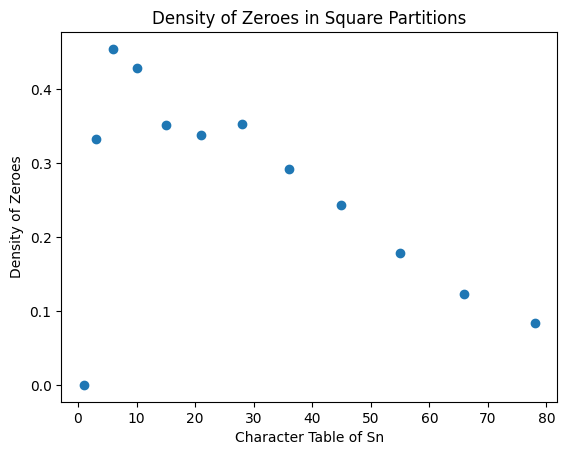

In [53]:
x_axis = [1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78]
density_of_zeroes = []
for N in x_axis:
    df = pd.read_csv("S{}_staircase.csv".format(N), header=None)
    no_zeroes = (df == 0).sum().sum()
    density_of_zeroes.append(no_zeroes / len(df.values))

plt.scatter(x_axis, density_of_zeroes)
plt.xlabel("Character Table of Sn")
plt.ylabel("Density of Zeroes")
plt.title("Density of Zeroes in Square Partitions")
plt.show()

## Desnity of l mod p in Staircase Partitions
File required:
 - S[N]_staircase.csv for all N's in the x_axis list

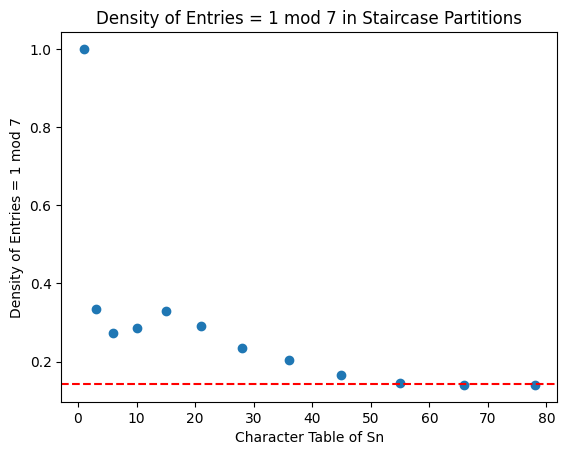

In [54]:
x_axis = [1, 3, 6, 10, 15, 21, 28, 36, 45, 55, 66, 78]
p = 7
l = 1
density_of_mod = []
for N in x_axis:
    df = pd.read_csv("S{}_staircase.csv".format(N), header=None)
    even_entries = (df % p == l).sum().sum()
    density_of_mod.append(even_entries / len(df.values))

plt.scatter(x_axis, density_of_mod)
plt.axhline(y=1/p, color='r', linestyle='--', label="y = 1/{}".format(p))
plt.xlabel("Character Table of Sn")
plt.ylabel("Density of Entries = {} mod {}".format(l, p))
plt.title("Density of Entries = {} mod {} in Staircase Partitions".format(l, p))
plt.show()